In [1]:
from binance.client import Client

class BinanceAPI:
    def __init__(self):
        API_KEY = "sGluVkVkz1Sfcq1yGzJXlCNQ3cp1k1JIMukzCK5y8u4bsNfGt11Nq66mkvXFqKrw"
        API_SECRET = "QiPMu58JB6Yq9Mv4O9NH4oPnXMI7nootEf8TgJvYZJfqryV8leNjjN8Y25zLNomi"
        self.client = Client(API_KEY, API_SECRET)
    
    #銘柄を指定して情報を取得する
    def get_ticker_value(self, pair):
        try:
            value = self.client.get_ticker(symbol=pair)
            return value
        except Exception as e:
            print("Error Message : {}".format(e))
            return
    
    #全ての銘柄とその価格を取得する
    def get_all_ticker_value(self):
        try:
            value = self.client.get_all_tickers()
            return value
        except Exception as e:
            print("Error Message : {}".format(e))
            return
    
    #任意の銘柄の過去の取引を取得する
    def get_some_historical_value(self, label, limit=500):
        try:
            value = self.client.get_historical_trades(symbol=label, limit=limit)
            return value
        except Exception as e:
            print("Error Message : {}".format(e))
            return
        
    def get_some_kline_value(self, label, start_date, end_date, interval="1d"):
        try:
            value = self.client.get_klines(symbol=label, startTime=start_date, endTime=end_date, interval=interval)
            return value
        except Exception as e:
            print("Error Message : {}".format(e))
            return
    
    def get_some_order_book(self, label):
        try:
            value = self.client.get_order_book(symbol=label)
            return value
        except Exception as e:
            print("Error Message : {}".format(e))
            return
        
    def get_all_symbol(self):
        try:
            value = self.client.get_all_isolated_margin_symbols()
            return value
        except Exception as e:
            print("Error Message : {}".format(e))
            return

    def get_volume(self, symbol, interval):
        try:
            value = self.client.get_klines(symbol=symbol, interval=interval, limit=100)
            return value
        except Exception as e:
            print("Error Message : {}".format(e))
            return
        

binance_set = BinanceAPI()



In [27]:
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1DAY

value = binance_set.get_volume(symbol=symbol, interval=interval)

In [31]:
import pandas as pd

# データをPandas DataFrameに変換
df = pd.DataFrame(value, columns=[
    'open_time', 'open', 'high', 'low', 'close', 'volume', 
    'close_time', 'quote_asset_volume', 'number_of_trades', 
    'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
])

# 必要なカラムのみ表示（例：時間と取引量）
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df["sell_value"] = pd.to_numeric(df['volume'], errors='coerce') - pd.to_numeric(df['taker_buy_base_asset_volume'], errors='coerce') 
df = df[['open_time', 'volume', "sell_value", 'taker_buy_base_asset_volume']]

# 取引量データを表示
print(df)

    open_time          volume   sell_value taker_buy_base_asset_volume
0  2024-07-08  48090.20490000  24126.29806              23963.90684000
1  2024-07-09  27732.20788000  13588.95787              14143.25001000
2  2024-07-10  24951.73799000  12528.20637              12423.53162000
3  2024-07-11  29761.05735000  14741.75600              15019.30135000
4  2024-07-12  23652.45690000  12163.63145              11488.82545000
..        ...             ...          ...                         ...
95 2024-10-11  23641.35209000  11541.78454              12099.56755000
96 2024-10-12  10911.30116000   5714.38421               5196.91695000
97 2024-10-13  11909.21995000   6054.17378               5855.04617000
98 2024-10-14  37669.95222000  17728.83316              19941.11906000
99 2024-10-15   1710.37634000    973.05188                737.32446000

[100 rows x 4 columns]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


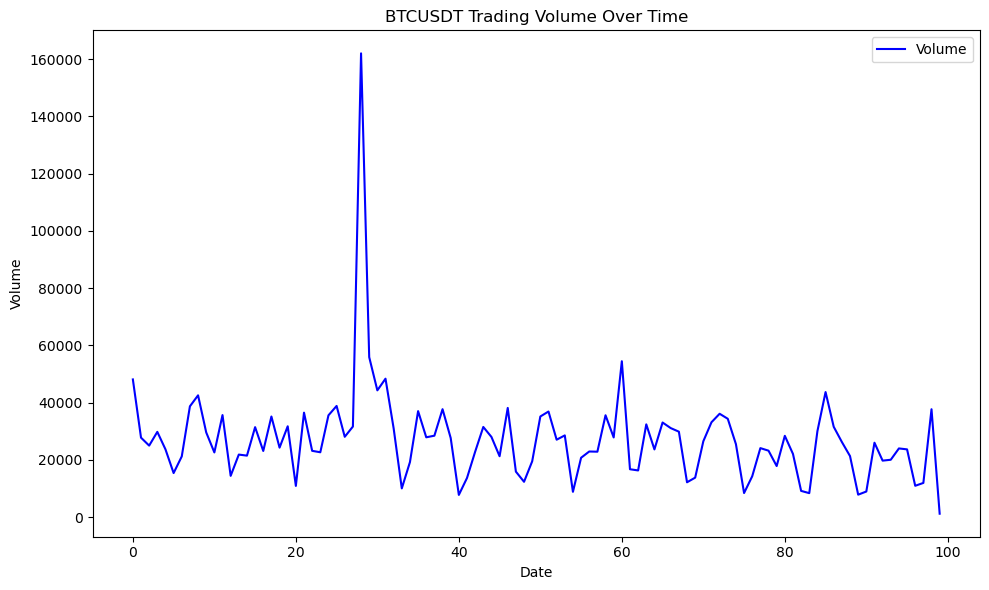

In [18]:
import matplotlib.pyplot as plt

# 先ほど取得した取引量データ (df) が存在する前提

# グラフのサイズを設定
plt.figure(figsize=(10, 6))

df["volume"] = pd.to_numeric(df['volume'], errors='coerce')
x = [i for i in range(0,100)]
print(x)

# 取引量の推移をプロット
plt.plot(x, df['volume'], label='Volume', color='blue')

# グラフのタイトルとラベルを設定
plt.title(f'{symbol} Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# ラベルを表示
plt.legend()

# グラフを表示
plt.tight_layout()
plt.show()

## 売り注文量

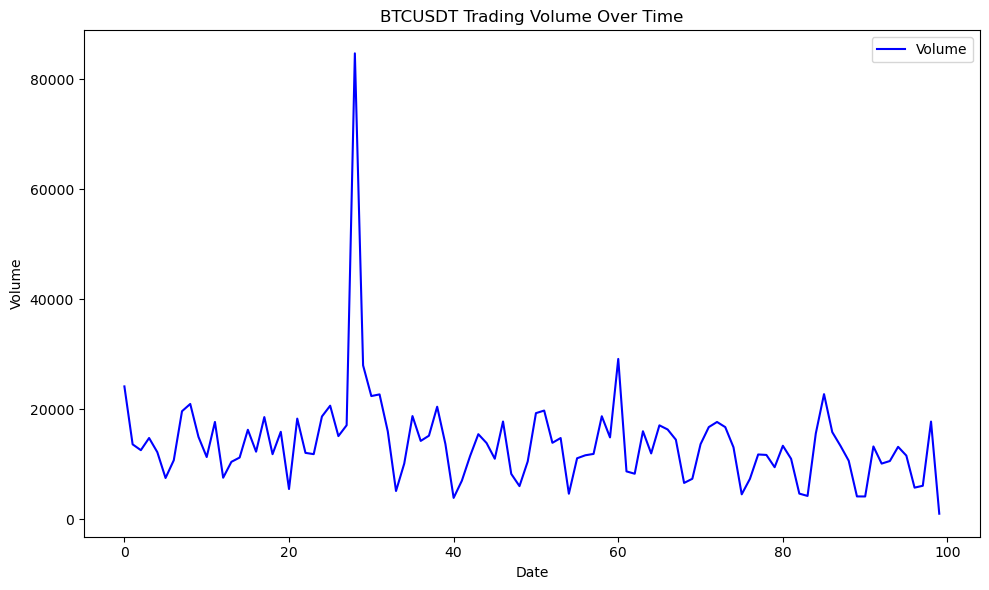

In [30]:
import matplotlib.pyplot as plt

# 先ほど取得した取引量データ (df) が存在する前提

# グラフのサイズを設定
plt.figure(figsize=(10, 6))

x = [i for i in range(0,100)]

# 取引量の推移をプロット
plt.plot(x, df["sell_value"], label='Volume', color='blue')

# グラフのタイトルとラベルを設定
plt.title(f'{symbol} Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# ラベルを表示
plt.legend()

# グラフを表示
plt.tight_layout()
plt.show()

## 買い注文

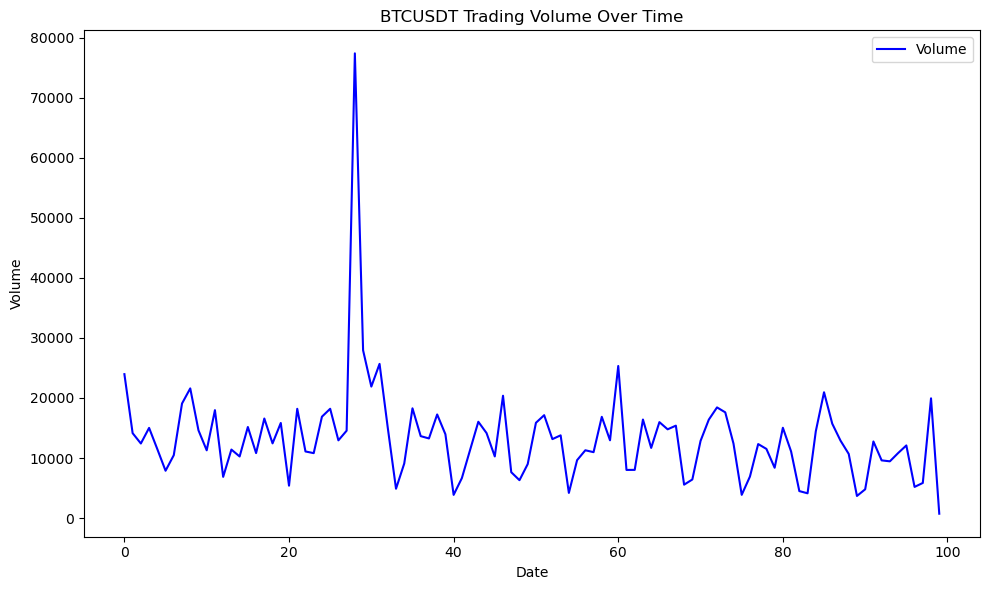

In [32]:
import matplotlib.pyplot as plt

# 先ほど取得した取引量データ (df) が存在する前提

# グラフのサイズを設定
plt.figure(figsize=(10, 6))

df["taker_buy_base_asset_volume"] = pd.to_numeric(df['taker_buy_base_asset_volume'], errors='coerce')
x = [i for i in range(0,100)]

# 取引量の推移をプロット
plt.plot(x, df["taker_buy_base_asset_volume"], label='Volume', color='blue')

# グラフのタイトルとラベルを設定
plt.title(f'{symbol} Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# ラベルを表示
plt.legend()

# グラフを表示
plt.tight_layout()
plt.show()

## 両方プロット

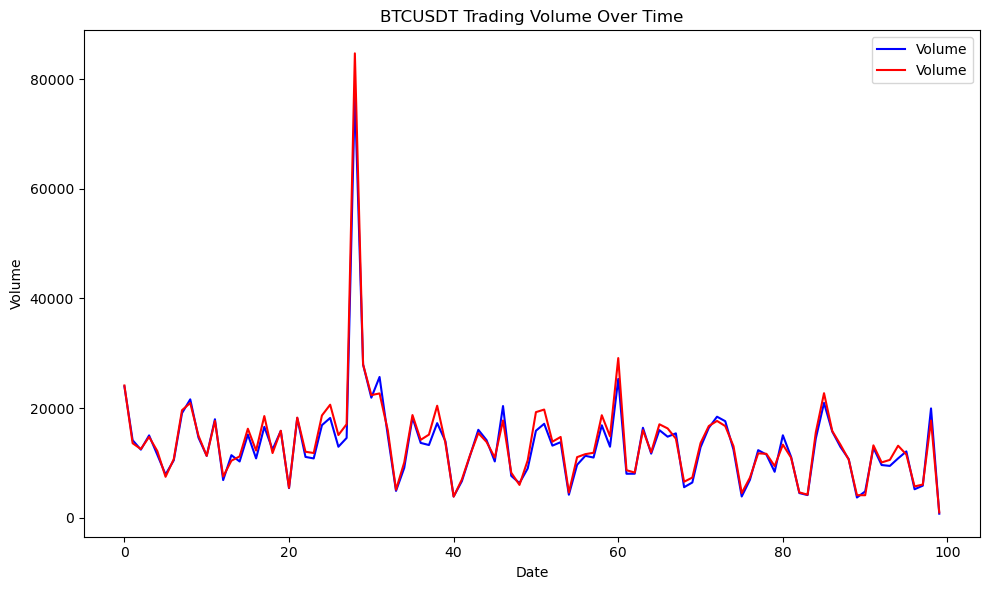

In [34]:
import matplotlib.pyplot as plt

# 先ほど取得した取引量データ (df) が存在する前提

# グラフのサイズを設定
plt.figure(figsize=(10, 6))

df["taker_buy_base_asset_volume"] = pd.to_numeric(df['taker_buy_base_asset_volume'], errors='coerce')
x = [i for i in range(0,100)]

# 取引量の推移をプロット
plt.plot(x, df["taker_buy_base_asset_volume"], label='Volume', color='blue')
plt.plot(x, df["sell_value"], label='Volume', color='red')

# グラフのタイトルとラベルを設定
plt.title(f'{symbol} Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# ラベルを表示
plt.legend()

# グラフを表示
plt.tight_layout()
plt.show()

In [19]:
value[0]

[1720396800000,
 '55857.81000000',
 '58236.73000000',
 '54260.16000000',
 '56714.62000000',
 '48090.20490000',
 1720483199999,
 '2699942701.37551110',
 2554389,
 '23963.90684000',
 '1346497811.21179220',
 '0']